In [19]:
library(tidyverse)
library(stargazer)
library(olsrr)
library(readr)
library(readxl)
library(dplyr)
library(broom)
library(car)
library(lmtest)
library(corpcor)
library(sandwich)
library(fastDummies)
library(plm)
library(forecast)

options(scipen=10)

# IN VMT and Income Data

In [20]:
nhts = read.csv('data/vehpub.csv')
nhts = nhts[c('HHSTATE','HHFAMINC','BESTMILE')]

In [21]:
nhts.in = nhts[nhts$HHSTATE=='IN',]


In [22]:
incmile = aggregate(BESTMILE ~ HHFAMINC,data=nhts.in,mean)
incmile$Bracket = c('Not Ascertained','I Dont Know','I prefer not to answer','Less than $10,000','$10,000-$14,999','$15,000-$24,999','$25,000-$34,999','$35,000-$49,999','$50,000-$74,999','$75,000-$99,999','$100,000-$124,999','$125,000-$149,999','$150,000-$199,999','$200,000 or more')

In [26]:
incmile = incmile[c('HHFAMINC','Bracket','BESTMILE')][4:14,]
incmile

,HHFAMINC,Bracket,BESTMILE
,<int>,<chr>,<dbl>
4,1,"Less than $10,000",7073.292
5,2,"$10,000-$14,999",7580.397
6,3,"$15,000-$24,999",9013.537
7,4,"$25,000-$34,999",9192.938
8,5,"$35,000-$49,999",9153.338
9,6,"$50,000-$74,999",9815.247
10,7,"$75,000-$99,999",10099.842
11,8,"$100,000-$124,999",11268.174
12,9,"$125,000-$149,999",10594.203


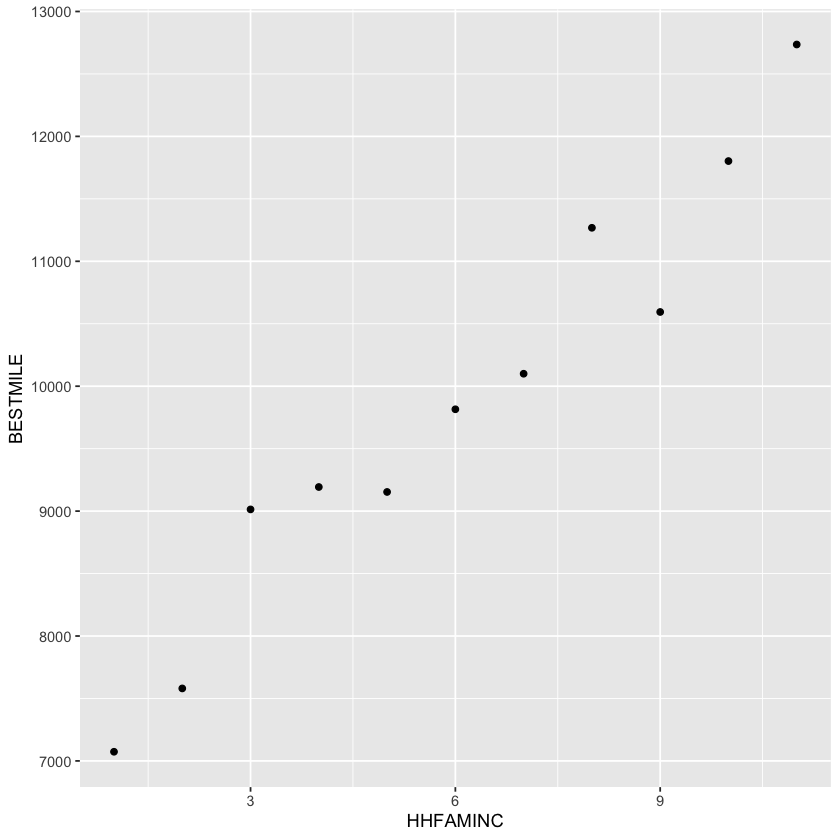

In [29]:
ggplot(incmile, aes(HHFAMINC,BESTMILE)) + geom_point()